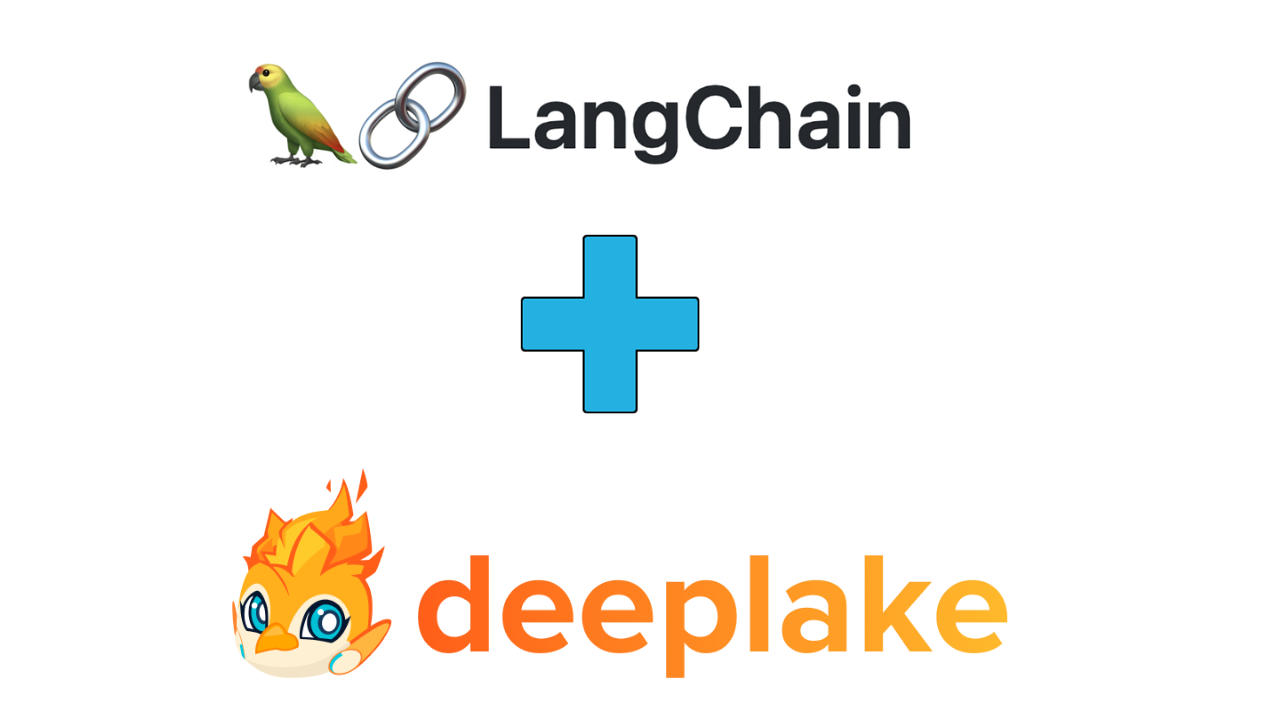

In [1]:
import os

In [2]:
os.environ['OPENAI_API_KEY']="sk-"
os.environ['ACTIVELOOP_TOKEN']="..-"

In [3]:
!pip install langchain==0.0.208 deeplake openai==0.27.8 tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.4/583.4 kB 47.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.6/73.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 71.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 

In [4]:
from langchain.llms import OpenAI

In [5]:
llm = OpenAI(model="text-davinci-003",temperature=0.9)

In [6]:
text = "Suggest a personalized workout routine for someone looking to improve cardiovascular endurance and prefers outdoor activities."
print(llm(text))



1. Jogging/Running - 3-4 times a week for 20-30 minutes.

2. Hill/Trail Running - 2-3 times a week for 20-30 minutes.

3. Cycling - 2-3 times a week for 25-30 minutes.

4. Swimming - 2-3 times a week for 20-30 minutes.

5. Rowing - 2-3 times a week for 15-20 minutes.

6. Hiking - 1-2 times a week for 30-60 minutes.

7. Interval Training - 1-2 times a week for 20-30 minutes.

8. Yoga/Stretching - 2-3 times a week for 10-15 minutes.


In [7]:
from langchain.prompts import PromptTemplate
from langchain.llms import OpenAI
from langchain.chains import LLMChain

llm = OpenAI(model="text-davinci-003",temperature=0.9)

prompt = PromptTemplate(
    input_variables=["product"],
    template="What is a good name for a company that makes {product}?",
)

chain = LLMChain(
    llm=llm,
    prompt=prompt
)

In [8]:
print(chain.run("eco-friendly water bottles"))



EcoLife Water Bottles.


In [9]:
from langchain.llms import OpenAI
from langchain.chains import ConversationChain
from langchain.memory import ConversationBufferMemory

llm = OpenAI(
    model="text-davinci-003",
    temperature=0
)

In [10]:
conversation= ConversationChain(
    llm=llm,
    verbose=True,
    memory=ConversationBufferMemory()
)

conversation.predict(input="Tell me about yourself")

conversation.predict(input="What can you do?")
conversation.predict(input="How can you help me with data analysis?")

print(conversation)



> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Tell me about yourself
AI:

> Finished chain.


> Entering new  chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
Human: Tell me about yourself
AI:  Hi there! My name is AI and I'm a virtual assistant. I'm here to help you with any questions you may have. I'm powered by artificial intelligence and I'm constantly learning new things. I'm also able to provide you with information from my context, such as the current weather, news, and more. What 

In [11]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import DeepLake
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA

llm = OpenAI(model="text-davinci-003",temperature=0)

embeddings = OpenAIEmbeddings(model="text-embedding-ada-002")

texts = [
    "Napoleon Bonaparte was born in 15 August 1769",
    "Louis XIV was born in 5 September 1638"
]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=0
)

docs = text_splitter.create_documents(texts)

org_id = "..."
datasetname="..."

dataset_path = f"hub://{org_id}/{datasetname}"

db = DeepLake(
    dataset_path=dataset_path,
    embedding_function=embeddings
)

db.add_documents(docs)

Your Deep Lake dataset has been successfully created!


Creating 2 embeddings in 1 batches of size 2:: 100%|██████████| 1/1 [00:03<00:00,  3.63s/it]

Dataset(path='hub://anananantha28/Langchain_anantha', tensors=['text', 'metadata', 'embedding', 'id'])

  tensor      htype      shape     dtype  compression
  -------    -------    -------   -------  ------- 
   text       text      (2, 1)      str     None   
 metadata     json      (2, 1)      str     None   
 embedding  embedding  (2, 1536)  float32   None   
    id        text      (2, 1)      str     None   


['e6cee848-9f66-11ee-8ce2-0242ac1c000c',
 'e6ceea6e-9f66-11ee-8ce2-0242ac1c000c']

In [13]:
retrieval_qa = RetrievalQA.from_chain_type(
    llm=llm,
    chain_type="stuff",
    retriever=db.as_retriever()
)

In [14]:
from langchain.agents import initialize_agent,Tool
from langchain.agents import AgentType

tools = [
    Tool(
        name="Retrieval QA System",
        func=retrieval_qa.run,
        description="Useful for answering questions."
    ),
]

agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

In [15]:
response = agent.run("When was Napoleone born?")
print(response)



> Entering new  chain...
 I need to find out when Napoleone was born.
Action: Retrieval QA System
Action Input: When was Napoleone born?
Observation:  Napoleon Bonaparte was born on 15 August 1769.
Thought: I now know the final answer.
Final Answer: Napoleon Bonaparte was born on 15 August 1769.

> Finished chain.
Napoleon Bonaparte was born on 15 August 1769.


In [16]:
db = DeepLake(
    dataset_path=dataset_path,
    embedding_function=embeddings
)

texts = [
    "Lady Gaga was born in 28 March 1986",
    "Michael Jeffrey Jordan was born in 17 February 1963"
]

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.create_documents(texts)

db.add_documents(docs)


Deep Lake Dataset in hub://anananantha28/Langchain_anantha already exists, loading from the storage


Creating 2 embeddings in 1 batches of size 2:: 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]

Dataset(path='hub://anananantha28/Langchain_anantha', tensors=['embedding', 'id', 'metadata', 'text'])

  tensor      htype      shape     dtype  compression
  -------    -------    -------   -------  ------- 
 embedding  embedding  (4, 1536)  float32   None   
    id        text      (4, 1)      str     None   
 metadata     json      (4, 1)      str     None   
   text       text      (4, 1)      str     None   


['206d82de-9f68-11ee-8ce2-0242ac1c000c',
 '206d8478-9f68-11ee-8ce2-0242ac1c000c']

In [17]:
llm = OpenAI(model="text-davinci-003", temperature=0)

retrieval_qa = RetrievalQA.from_chain_type(
	llm=llm,
  chain_type="stuff",
  retriever=db.as_retriever()
)

tools = [
    Tool(
        name="Retrieval QA System",
        func=retrieval_qa.run,
        description="Useful for answering questions."
    ),
]

agent = initialize_agent(
	tools,
	llm,
	agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
	verbose=True
)


In [18]:
response = agent.run("When was Michael Jordan born?")
print(response)



> Entering new  chain...
 I need to find out when Michael Jordan was born.
Action: Retrieval QA System
Action Input: When was Michael Jordan born?
Observation:  Michael Jordan was born on 17 February 1963.
Thought: I now know the final answer.
Final Answer: Michael Jordan was born on 17 February 1963.

> Finished chain.
Michael Jordan was born on 17 February 1963.


In [22]:
from langchain.llms import OpenAI

from langchain.agents import AgentType
from langchain.agents import load_tools
from langchain.agents import initialize_agent

from langchain.agents import Tool
from langchain.utilities import GoogleSearchAPIWrapper

In [23]:
llm = OpenAI(model="text-davinci-003", temperature=0)

In [31]:
!pip install -U duckduckgo-search

In [32]:
from langchain.tools import DuckDuckGoSearchRun

In [33]:
search = DuckDuckGoSearchRun()

In [34]:
tools = [
    Tool(
        name = "google-search",
        func = search.run,
        description = "useful for when you need to search google to answer questions about current events"
    )
]

In [35]:
agent = initialize_agent(tools,
                         llm,
                         agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
                         verbose=True,
                         max_iterations=6)

In [36]:
response = agent("What's the latest news about the Mars rover?")
print(response['output'])



> Entering new  chain...
 I need to find out the latest news about the Mars rover
Action: google-search
Action Input: "latest news Mars rover"
Observation: CNN — After spending 1,000 days on the Martian surface, NASA's Perseverance rover has uncovered new details about the history of an ancient lake and river delta on the red planet. Mars Curiosity Rover Mission Mission Mission Updates December 18, 2023 Sols 4041-4042: Rocker-Bogie Around the Marsmas Sea Written by Natalie Moore, Mission Operations Specialist at Malin Space Science Systems This image was taken by Left Navigation Camera onboard NASA's Mars rover Curiosity on Sol 4040. Credits: NASA/JPL-Caltech. Download image › As Perseverance continues to wrap up its current activities at Turquoise Bay where it collected a new sample for possible return to Earth, the Mars 2020 team is getting ready for Perseverance to approach the next site in the Margin Unit campaign, a site called Jurabi Point, also known as the "gateway" to Gnaral

In [37]:
from langchain.llms import OpenAIChat
from langchain.agents import Tool
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain
from langchain.agents import initialize_agent, AgentType

In [38]:
from langchain.tools import DuckDuckGoSearchRun

In [39]:
llm = OpenAI(model="text-davinci-003", temperature=0)

prompt = PromptTemplate(
    input_variables=["query"],
    template="Write a summary of the following text: {query}"
)

summarize_chain = LLMChain(llm=llm, prompt=prompt)

In [40]:
search = DuckDuckGoSearchRun()

tools = [
    Tool(
        name="Search",
        func=search.run,
        description="useful for finding information about recent events"
    ),

    Tool(
        name="Summarizer",
        func=summarize_chain.run,
        description='useful for summarizing texts'
    )
]

In [41]:
agent = initialize_agent(
    tools,
    llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True
)

In [42]:
response = agent("What's the latest news about the Mars rover? Then please summarize the results.")
print(response['output'])



> Entering new  chain...
 I need to find the latest news about the Mars rover and then summarize it.
Action: Search
Action Input: Latest news about the Mars rover
Observation: CNN.com View 3 comments Sponsored Content KARD Monroe Story by Lauren Sforza • 3d After 1,000 days on the Martian surface, the Perseverance rover has collected samples that reveal the history of... CNN —. After spending 1,000 days on the Martian surface, NASA's Perseverance rover has uncovered new details about the history of an ancient lake and river delta on the red planet. The new ... As Perseverance continues to wrap up its current activities at Turquoise Bay where it collected a new sample for possible return to Earth, the Mars 2020 team is getting ready for Perseverance to approach the next site in the Margin Unit campaign, a site called Jurabi Point, also known as the "gateway" to Gnaraloo Bay. NASA's real-time portal for Mars exploration, featuring the latest news, images, and discoveries from the Red P


Observation: 

The Perseverance rover has been on the Martian surface for 1,000 days and has collected samples that reveal the history of the planet. The samples show evidence of ancient lakes and rivers, and the presence of organic molecules, which could indicate the presence of life on Mars in the past. The rover has also taken images of the planet's surface, which could help scientists better understand the planet's geology. The data collected by the rover will help scientists better understand the history of Mars and the potential for life on the planet.
Thought:

 I now know the final answer.
Final Answer: The Perseverance rover has been on the Martian surface for 1,000 days and has collected samples that reveal the history of the planet, including evidence of ancient lakes and rivers, and the presence of organic molecules, which could indicate the presence of life on Mars in the past.

> Finished chain.
The Perseverance rover has been on the Martian surface for 1,000 days and has collected samples that reveal the history of the planet, including evidence of ancient lakes and rivers, and the presence of organic molecules, which could indicate the presence of life on Mars in the past.
